#     Export to European countries Analysis



## Aim of the Project
### Aim of the project is to analyze exports commodity to different countries in European continent by region over time from india.By examine key variables such country level and region level classification and quantity,trade value, categories find the trends, identify patterns and generate actionable insights

## Objective


Deliver actionable insights from Exports to European countries data to:

- Identifying most trade happening country
- Determine the Most Exported Items
- Understand Yearly and Monthly Trends
- Identify Regional Trade Trends

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from pandas.api.types import CategoricalDtype
import plotly.express as px
import plotly.graph_objects as go


In [2]:
url="https://indiadataportal.com/p/export-trade-statistics/r/mci-tradestat_export_lfy-cn-mn-eur"

In [3]:
df=pd.read_csv(r"C:\Users\Ashi\Desktop\project\exports-to-european-countries (2).csv")

## Data Explorations:
Columns Description :

- Id : Unique ID for every trade
- Date: Date of trade happened 
- Country Name:country where trade happened
- alpha code:ISO alpha 3 code
- Country code:Unique code for each country
- region:Region where Trade happened
- region code:rgion code
- sub region:region classifies 4 sub regions
- sub region code: each sub region have separate code
- hs code:Harmonized system code
- commodity:commodity name
- unit:Unit of quantity
- value qt:Quantity of commodity
- value rs:value of commodity in INR
- value dl:value of commodity in dollar


## Descriptive Analysis

In [4]:
# print the first five rows in the dataset to get overview of the dataset

df.head()

,id,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
0,0,2015-01-01,Albania,ALB,8.0,Europe,150,Southern Europe,39,21061000,Protein Concntrts And Textured Protn Sbstncs,Kgs,20.00,10.05,0.02
1,1,2015-01-01,Albania,ALB,8.0,Europe,150,Southern Europe,39,28352200,Mono Or Disodium Phosphate,Kgs,0.10,0.57,0.00
2,2,2015-01-01,Albania,ALB,8.0,Europe,150,Southern Europe,39,29221990,Other,Kgs,0.02,4.97,0.01
3,3,2015-01-01,Albania,ALB,8.0,Europe,150,Southern Europe,39,29241100,Meprobamate (Inn),Kgs,0.20,3.70,0.01
4,4,2015-01-01,Albania,ALB,8.0,Europe,150,Southern Europe,39,29331990,*Other Compnds Cntng An Unfused Pyrazole Ring ...,Kgs,0.00,0.80,0.00


In [5]:
df.sample()

,id,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
2511802,2511802,2024-10-01,Poland,POL,616.0,Europe,150,Eastern Europe,151,32029090,Othr Inorganic Tanning Substances N.E.S.,Kgs,400.0,0.0,0.0


In [6]:
# to print the last five rows in the dataset

df.tail()

,id,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
2827466,2827466,2025-07-01,Ukraine,UKR,804.0,Europe,150,Eastern Europe,151,95030020,Non-Electronic Toys Etc.,Nos,7500.0,0.16,0.02
2827467,2827467,2025-07-01,Ukraine,UKR,804.0,Europe,150,Eastern Europe,151,95069990,Other Sports Equipments,Nos,100.0,0.00,0.00
2827468,2827468,2025-07-01,Ukraine,UKR,804.0,Europe,150,Eastern Europe,151,96081099,Other Ball-Point Pens Without Liquid Ink (For ...,Nos,165120.0,0.11,0.01
2827469,2827469,2025-07-01,Ukraine,UKR,804.0,Europe,150,Eastern Europe,151,96110000,Date;Sealng/Numbrng Stmps(Incl Dvcs Fr Prntg/E...,Kgs,77.0,0.00,0.00
2827470,2827470,2025-07-01,Holy See(Vatican City),VAT,336.0,Europe,150,Southern Europe,39,12093000,Seeds Of Herbaceus Plnts Cultvtd For Flwrs,Kgs,4308.0,0.58,0.07


In [7]:
# Obtain the number of rows and columns in the dataset

rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")



Number of rows: 2827471
Number of columns: 15


In [8]:
# # Get a concise summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827471 entries, 0 to 2827470
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   date             object 
 2   country_name     object 
 3   alpha_3_code     object 
 4   country_code     float64
 5   region           object 
 6   region_code      int64  
 7   sub_region       object 
 8   sub_region_code  int64  
 9   hs_code          int64  
 10  commodity        object 
 11  unit             object 
 12  value_qt         float64
 13  value_rs         float64
 14  value_dl         float64
dtypes: float64(4), int64(4), object(7)
memory usage: 323.6+ MB


In [9]:
# # Generate descriptive statistics for numerical columns

df.describe()

,id,country_code,region_code,sub_region_code,hs_code,value_qt,value_rs,value_dl
count,2.827471e+06,2.815220e+06,2827471.0,2.827471e+06,2.827471e+06,2.799215e+06,2.827458e+06,2.706572e+06
mean,1.413735e+06,4.769843e+02,150.0,1.277746e+02,5.786885e+07,2.347985e+04,9.909787e+01,1.964410e-01
std,8.162207e+05,2.444953e+02,0.0,4.811571e+01,2.486176e+07,3.090445e+06,1.254746e+03,3.008616e+00
min,0.000000e+00,8.000000e+00,150.0,3.900000e+01,1.013090e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.068675e+05,2.760000e+02,150.0,1.510000e+02,3.506991e+07,2.000000e-01,4.400000e-01,0.000000e+00
50%,1.413735e+06,5.280000e+02,150.0,1.540000e+02,6.204120e+07,3.210000e+00,4.930000e+00,2.000000e-02
75%,2.120602e+06,7.240000e+02,150.0,1.550000e+02,8.409999e+07,4.400000e+01,3.544000e+01,8.000000e-02
max,2.827470e+06,8.320000e+02,150.0,1.550000e+02,1.000000e+08,1.773580e+09,4.744885e+05,1.311200e+03


In [10]:
# to find the data type of the columns
df.dtypes

id                   int64
date                object
country_name        object
alpha_3_code        object
country_code       float64
region              object
region_code          int64
sub_region          object
sub_region_code      int64
hs_code              int64
commodity           object
unit                object
value_qt           float64
value_rs           float64
value_dl           float64
dtype: object

In [11]:
# to remove duplicates

df = df.drop_duplicates()

In [12]:
# to find the no of missing values in columns

df.isnull().sum()

id                      0
date                    0
country_name            0
alpha_3_code        12251
country_code        12251
region                  0
region_code             0
sub_region              0
sub_region_code         0
hs_code                 0
commodity               0
unit                 3449
value_qt            28256
value_rs               13
value_dl           120899
dtype: int64

In [13]:
# to drop the rows which containing missing values in column value_rs because it contain only 13 missing values when we consider data set it can be negligible

df = df.dropna(subset=['value_rs'])


In [14]:
# to drop the rows which containing missing values in column unit because it contain 3449 missing values when we consider data set it can be negligible

df = df.dropna(subset=['unit'])


In [15]:
# fill missing values in column country_code with NA

df['country_code'] = df['country_code'].fillna("NA")

In [16]:
# fill missing values in column alpha_3_code with NA

df['alpha_3_code'] = df['alpha_3_code'].fillna("NA")

In [17]:
# replace missing value rows in column value_qt with its mean

df['value_qt']=df['value_qt'].fillna(value=df['value_qt'].mean())

In [18]:
# replace missing value rows in column value_dl with its mean

df['value_dl']=df['value_dl'].fillna(value=df['value_dl'].mean())

In [19]:
# to check no of missing values after handling missing values
df.isnull().sum()

id                 0
date               0
country_name       0
alpha_3_code       0
country_code       0
region             0
region_code        0
sub_region         0
sub_region_code    0
hs_code            0
commodity          0
unit               0
value_qt           0
value_rs           0
value_dl           0
dtype: int64

In [20]:
# to find the unique values in column country_name

df['country_name'].unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Denmark',
       'Estonia', 'Faroe Islands', 'Finland', 'France', 'Germany',
       'Gibraltar', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Kingdom of the Netherlands', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malta', 'Monaco', 'Montenegro',
       'Netherlands Antilles', 'North Macedonia', 'Norway', 'Poland',
       'Portugal', 'Republic of Moldova', 'Romania', 'Russian Federation',
       'San Marino', 'Serbia', 'Serbia and Montenegro', 'Slovakia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland', 'Andorra',
       'Holy See(Vatican City)', 'Jersey', 'Guernsey', 'Czechia'],
      dtype=object)

In [21]:
# to find the unique values in column commodity

df['commodity'].unique()

array(['Protein Concntrts And Textured Protn Sbstncs',
       'Mono Or Disodium Phosphate', 'Other', ...,
       'Hollow Bars Of Tantalum',
       '*Thiodiglycol:Bis (2-Hydroxyethyl)Sulphide',
       'Hollow Drl Bars And Rods Of Non Aloy Steel Forged'], dtype=object)

In [22]:
# create new column for finding total value

df['total_value']=df['value_qt'] * df['value_rs'] 

In [23]:
df['total_value_dl']=df['value_qt'] * df['value_dl'] 

In [24]:
# create new columns for date,month and quarter because its useful for time series analysis

df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
df['quarter'] = pd.to_datetime(df['date']).dt.quarter


In [25]:
month_map = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

df['month_name'] = df['month'].map(month_map)


In [26]:
# Correct month order
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

# Convert to ordered category
cat = CategoricalDtype(categories=month_order, ordered=True)
df['month_name'] = df['month_name'].astype(cat)

## Exploratory Analysis

### Univariate Analysis

In [27]:
# to detail study of column total_value
df['total_value'].describe()

count    2.824009e+06
mean     5.676587e+07
std      2.217944e+10
min      0.000000e+00
25%      2.016000e-01
50%      2.000700e+01
75%      9.208040e+02
max      1.939314e+13
Name: total_value, dtype: float64

In [28]:
df['total_value_dl'].describe()

count    2.824009e+06
mean     6.620455e+06
std      2.634027e+09
min      0.000000e+00
25%      0.000000e+00
50%      3.030000e-02
75%      2.767600e+00
max      2.325518e+12
Name: total_value_dl, dtype: float64

C:\Users\Ashi\AppData\Local\Temp\ipykernel_14164\4276331616.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index,y=top_countries.values,palette='rainbow')


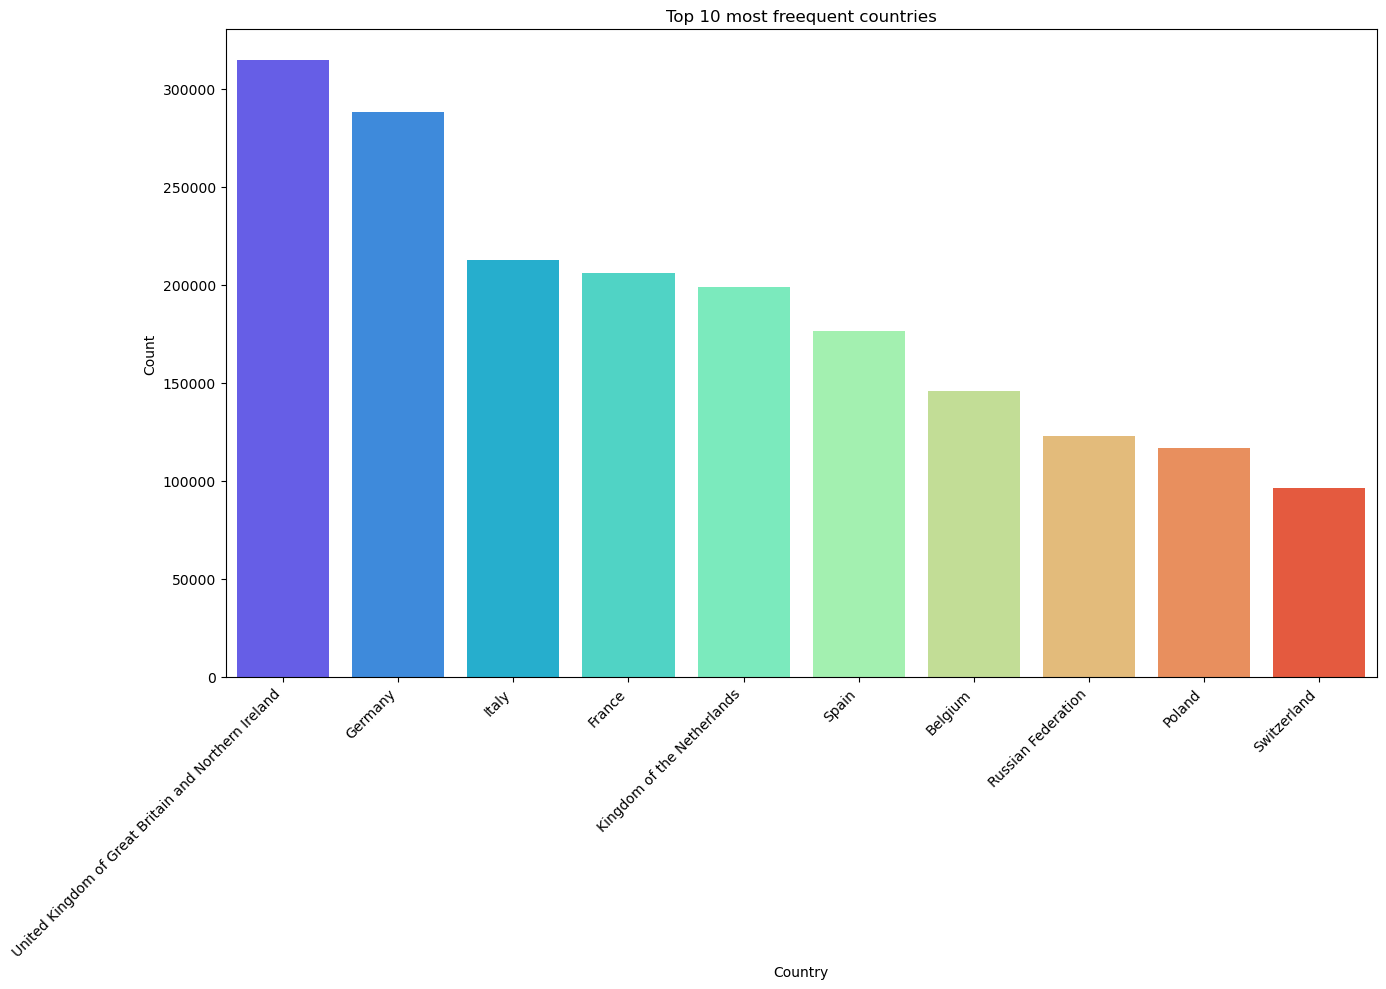

In [29]:
# to find the top 10 most freequent countries

top_countries=df['country_name'].value_counts().head(10)
top_countries
#plot
plt.figure(figsize=(14,10))
sns.barplot(x=top_countries.index,y=top_countries.values,palette='rainbow')
plt.title('Top 10 most freequent countries')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### INSIGHTS

### United Kingdom of Great Britain and Northern Ireland is the most freequent occurence of the country(>300000).Germany is the second most occurent country

C:\Users\Ashi\AppData\Local\Temp\ipykernel_14164\4054105268.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['commodity'].isin(top10)],x='commodity',palette='Set2')


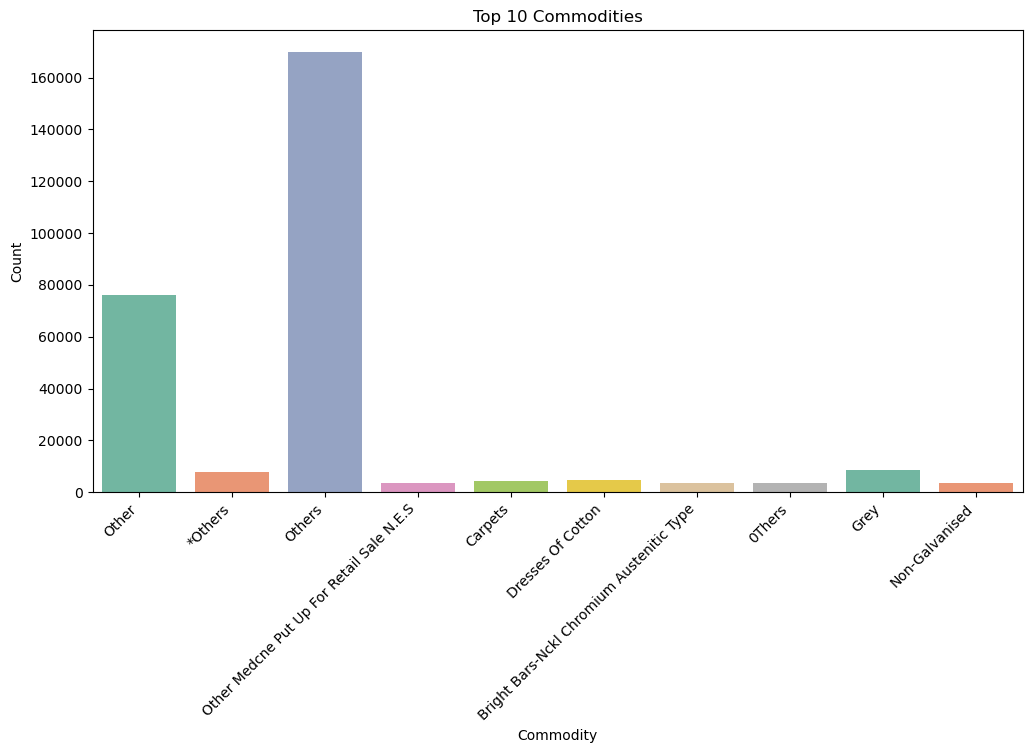

In [30]:
# to get largest 10 items count in column commodity

top10 = df['commodity'].value_counts().head(10).index

# use countplot but include only top 10 rows
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['commodity'].isin(top10)],x='commodity',palette='Set2')

plt.title('Top 10 Commodities')
plt.xlabel('Commodity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### INSIGHTS

### single category others dominant heavily.other than 'others' carpets,grey,medicine,dress of cotton appear in low counts

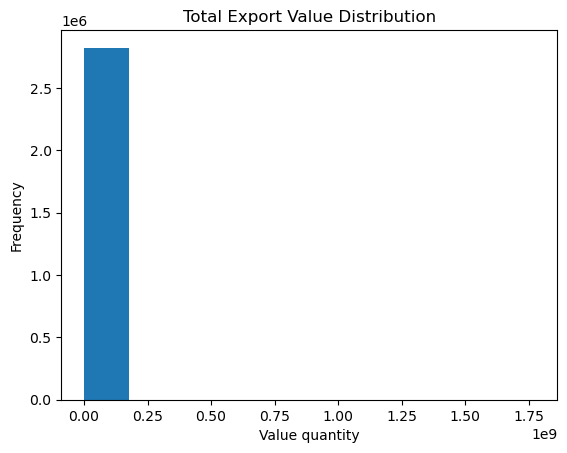

In [31]:
# to find value of quantity distribution
x=df['value_qt']
plt.hist(x)
plt.title("Total Export Value Distribution")
plt.xlabel("Value quantity")
plt.ylabel("Frequency")
plt.show()

## INSIGHTS

### Majority of exports are small value shipments and only few are very large shipments

## Bivariate Analysis

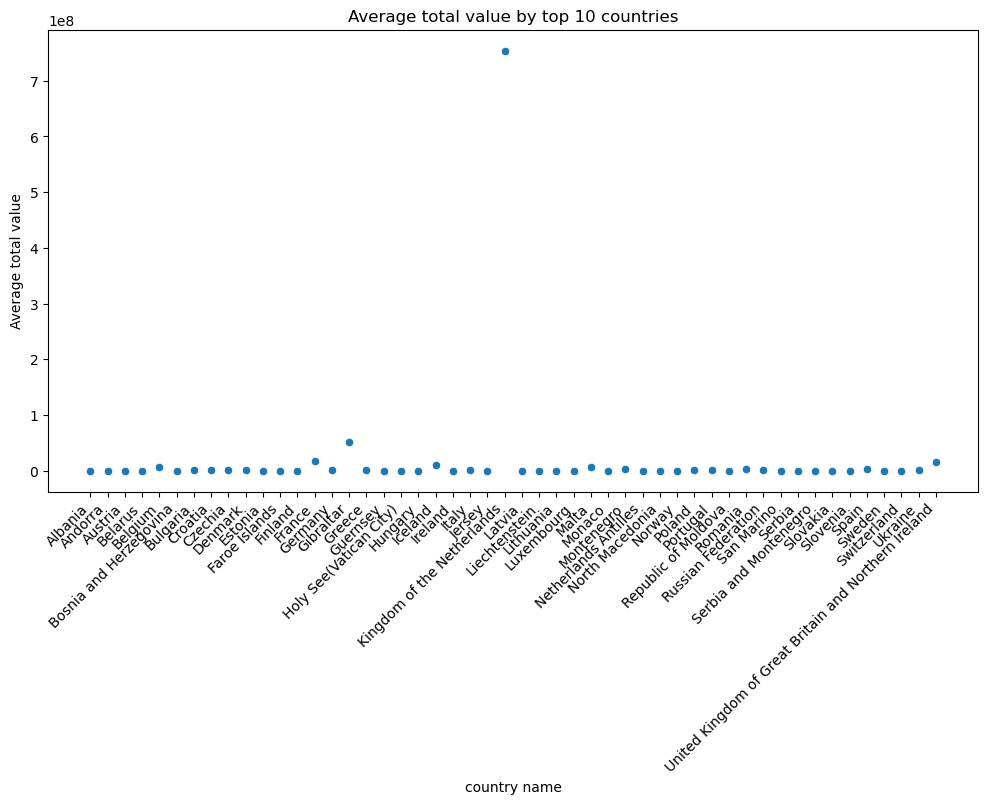

In [32]:
# to get total values by top 10 countreis

country_total_value=df.groupby('country_name')['total_value'].mean().reset_index()
#plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=country_total_value,x='country_name',y='total_value')
plt.title('Average total value by top 10 countries')
plt.xlabel('country name')
plt.ylabel('Average total value')
plt.xticks(rotation=45, ha='right');

## INSIGHTS

### Most countries have relatively small export values but One country shows a massive export value

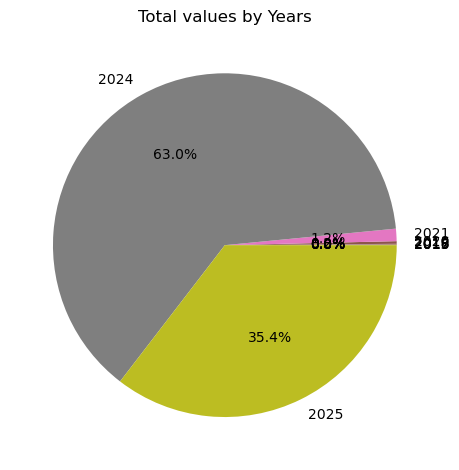

In [33]:
# to find the average value over years from 2015 to 2025(10 years)

year_total_value=df.groupby('year')['total_value'].sum()

#plot
plt.pie(year_total_value.values,labels=year_total_value.index,autopct='%1.1f%%')
plt.title('Total values by Years')
plt.tight_layout()      # Adjust layout to ensure everything fits well



## INSIGHTS

### In 2024 is the dominates(63%) it means major export activities done in 2024.2025 is the second largest year in the case exportation other years are vary less(<2%)

C:\Users\Ashi\AppData\Local\Temp\ipykernel_14164\896688058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_value_dl,x='sub_region',y='total_value_dl',palette='viridis')


Text(0, 0.5, 'Average total dollar value')

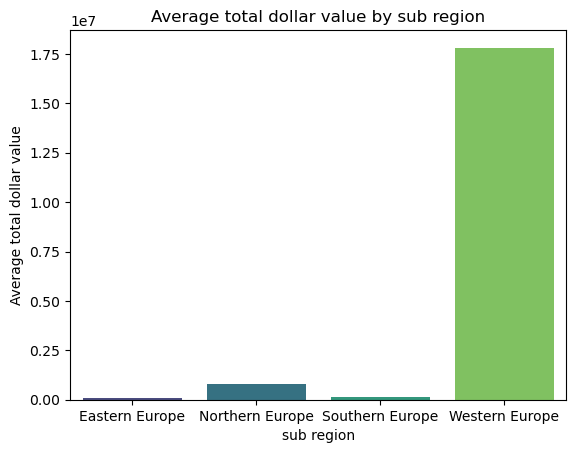

In [34]:
# to get average dollar value in sub regions
sub_value_dl=df.groupby('sub_region')['total_value_dl'].mean().reset_index()
sns.barplot(data=sub_value_dl,x='sub_region',y='total_value_dl',palette='viridis')
plt.title('Average total dollar value by sub region')
plt.xlabel('sub region')
plt.ylabel('Average total dollar value')


## INSIGHTS


### Almost exports are done to western europe

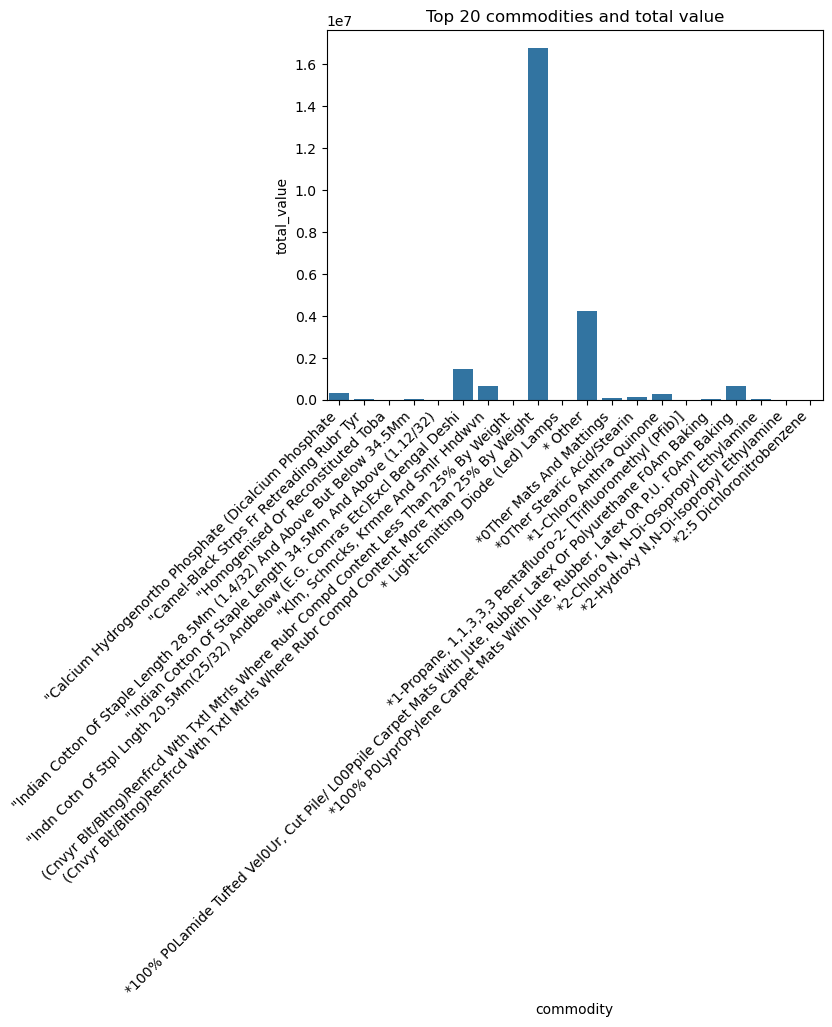

In [35]:
# to find the total value of top 20 commodities
commodity_total_value=df.groupby('commodity')['total_value'].sum().head(20).reset_index()
sns.barplot(data=commodity_total_value,x='commodity',y='total_value')
plt.title('Top 20 commodities and total value')
plt.xticks(rotation=45, ha='right');

In [36]:
# to find the trend of total value in months
monthly_value = df.groupby('month_name')['total_value'].mean()
monthly_value

C:\Users\Ashi\AppData\Local\Temp\ipykernel_14164\650426715.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_value = df.groupby('month_name')['total_value'].mean()


month_name
January      3.366408e+06
February     4.586540e+07
March        3.108461e+07
April        1.529664e+08
May          1.649754e+08
June         4.611775e+07
July         6.184911e+07
August       4.683018e+07
September    5.503605e+07
October      3.257635e+07
November     1.084748e+07
December     1.024128e+07
Name: total_value, dtype: float64

C:\Users\Ashi\AppData\Local\Temp\ipykernel_14164\2980115878.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_value = df.groupby('month_name')['total_value'].mean()


Text(0, 0.5, 'Total value(millions)')

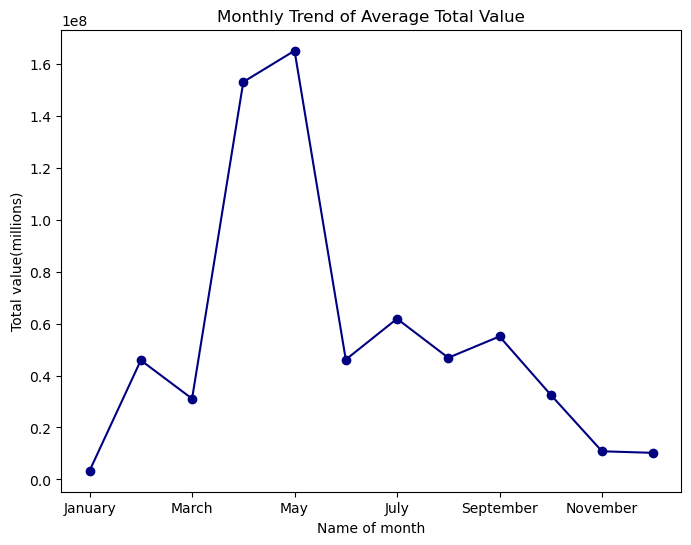

In [37]:
# to plot total_value in monthly
monthly_value = df.groupby('month_name')['total_value'].mean()
plt.figure(figsize=(8, 6))
monthly_value.plot(marker='o', color='navy')
plt.title('Monthly Trend of Average Total Value')
plt.xlabel('Name of month')
plt.ylabel('Total value(millions)')

### INSIGHTS---

### April and May show extremely high total values (around 150–165 million).At the begining and end of the the year export value showing less.Middle of the year is stable but moderate

## Multivariate Analysis

<Axes: xlabel='quarter', ylabel='total_value'>

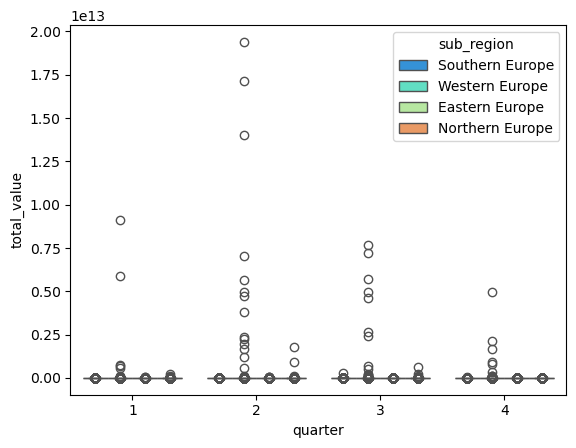

In [38]:
sns.boxplot(data=df,x='quarter',y='total_value',hue='sub_region',palette='rainbow')

## INSIGHTS

### Quarter 2 showing significant spike and others quarters are relatively stable and lower values

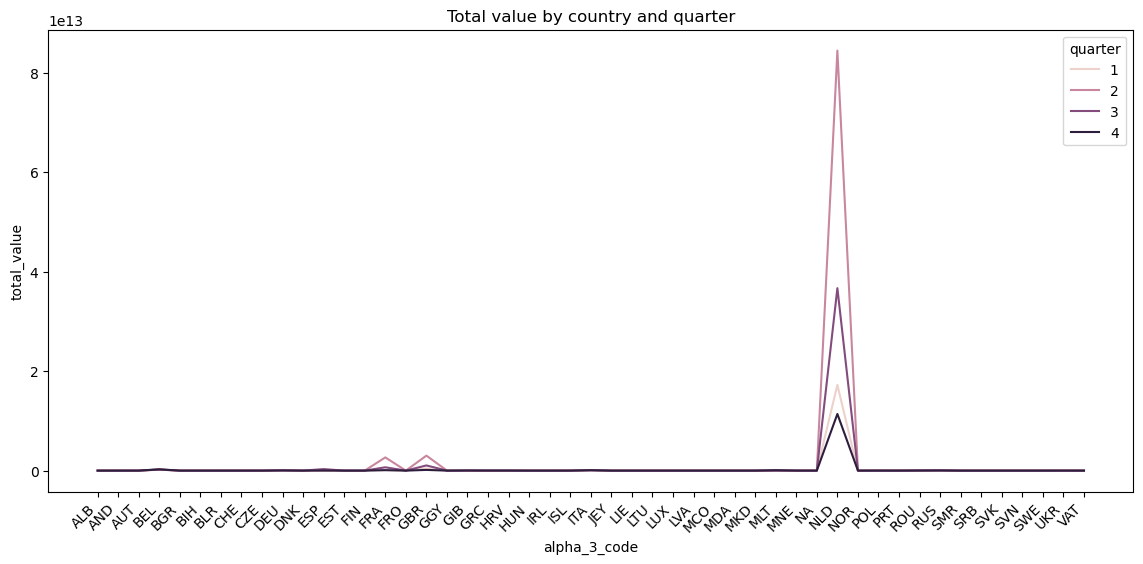

In [39]:
plt.figure(figsize=(14,6))
plot_df = df.groupby(['alpha_3_code', 'quarter'])['total_value'].sum().reset_index()
sns.lineplot(data=plot_df, x='alpha_3_code', y='total_value', hue='quarter')
plt.title('Total value by country and quarter')
plt.xticks(rotation=45, ha='right');


## INSIGHTS

### Norway(NOR) stands out highest value all four quarters.The line foe each quarter follow similar pattern and there is no quarter drastically deviate from others

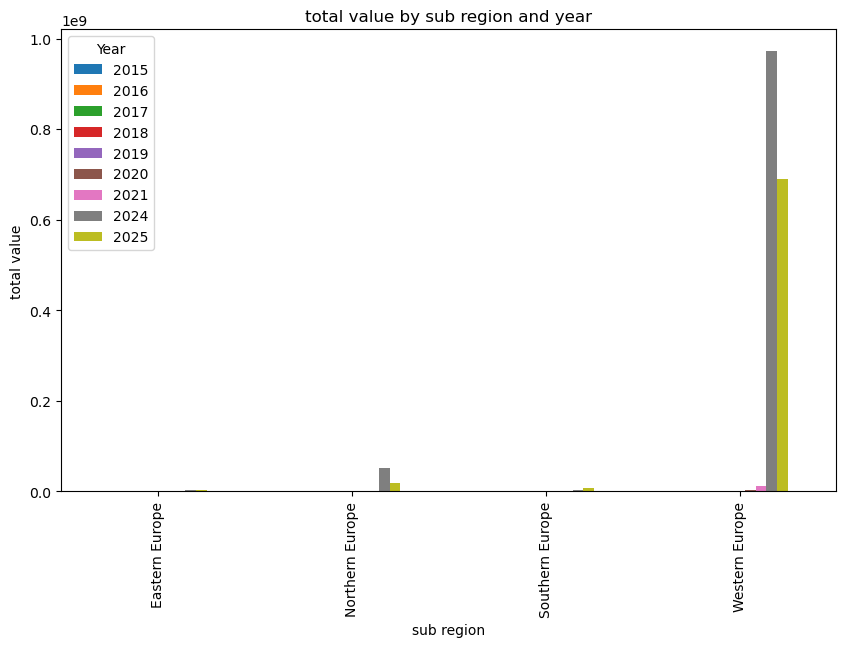

In [40]:
# to get the differece in total values over years in different sub regions

pivot_df=df.pivot_table(values='total_value',columns='year',index='sub_region')
pivot_df.plot(kind='bar',figsize=(10,6))
plt.title('total value by sub region and year')
plt.xlabel('sub region')
plt.ylabel('total value')
plt.legend(title='Year')

## INSIGHTS

### Western europe consistently outperforms other sub regions especially in 2024 &2025.Northern europe shows moderate growth.Eastern europe and Southern europe remain relatively flat across the year

In [41]:
# to find the correlation matrix
df[['value_qt','value_rs','value_dl', 'total_value']].corr()

,value_qt,value_rs,value_dl,total_value
value_qt,1.000000,0.014093,0.730047,0.919354
value_rs,0.014093,1.000000,0.620037,0.018994
value_dl,0.730047,0.620037,1.000000,0.686329
total_value,0.919354,0.018994,0.686329,1.000000


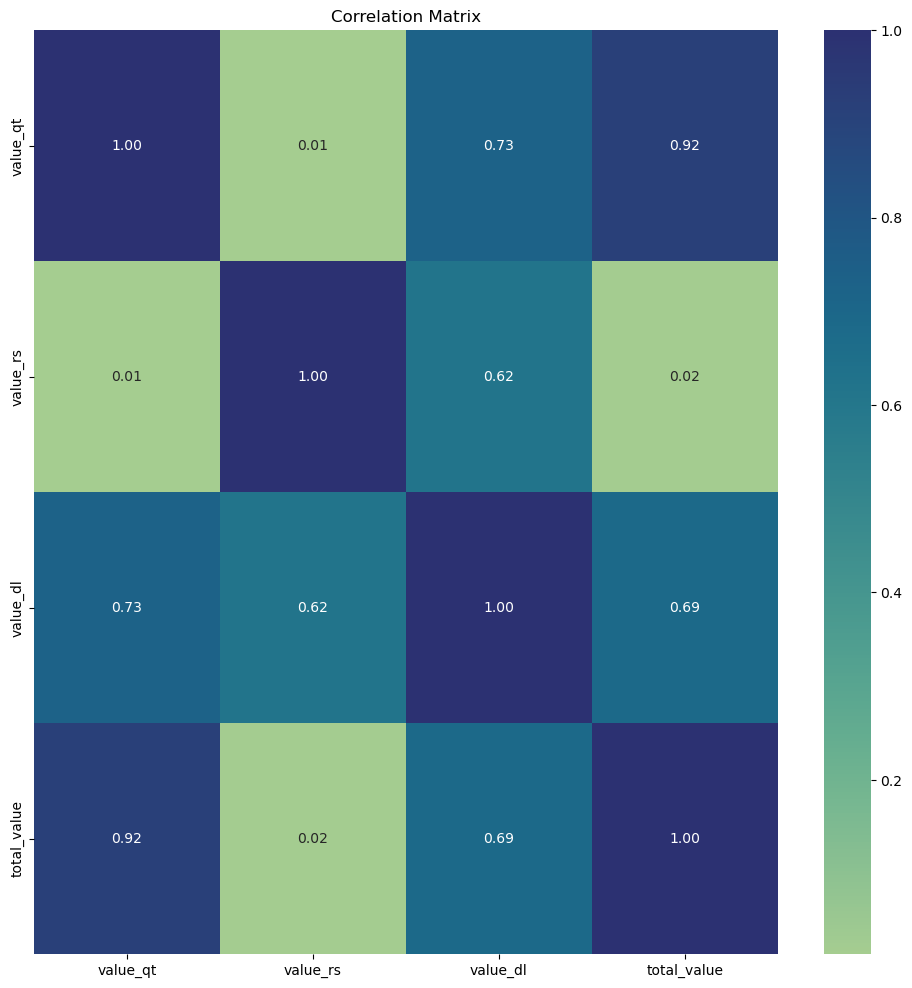

In [42]:
# to plot correlation matrix
numerical_columns=['value_qt','value_rs','value_dl','total_value']
corr=df[numerical_columns].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


## INSIGHTS

### Quantity and total value has strong relationship(correlation=0.92) when quantity increases total value increases

## INSIGHTS

### In 2024–2025, exports increased significantly, particularly toward Western Europe. This surge may be linked to post‑pandemic economic recovery, evolving trade policies, or broader market expansion.
### Trade activities are concentrated in a small number of countries, and the majority of exports fall within the low‑value range.
### The majority of trade activity occurs in Quarter 2 (April and May), suggesting potential seasonal patterns that may influence overall trading behavior.

## Recomendation

### Trade activities occur across all countries, although they are heavily concentrated in only a few.
### Trade activities are not limited to a single quarter; they occur continuously throughout the entire year.
### Focus on developing and supporting high‑value export sectors through targeted investment, improved supply‑chain efficiency, and stronger market diversification.
### Enhancing quality standards, expanding into premium international markets, and fostering innovation within these sectors can further increase the competitiveness and growth of high‑value exports.